In [177]:
! pip3 install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [178]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [179]:
#Read in the csv file and convert to a Pandas dataframe

In [180]:
#Read in the csv file and convert to a Pandas dataframe

In [181]:
# from google.colab import drive
# drive.mount('/content/drive')

In [182]:
football = pd.read_csv("Data/final_data.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [183]:
football.shape

(10754, 22)

In [184]:
football.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [185]:
pd.set_option('display.max_columns', None)
football.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [186]:
football.describe(include="object")


,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [187]:
football.describe(include="integer")

,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,36.407011,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,26.526541,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,12.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,35.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,59.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,107.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [188]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [189]:
football['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [190]:
football[football['position']=="Defender Centre-Back"]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.000000,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.000000,0.0,0.0,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.000000,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.000000,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.000000,0.0,0.0,416,932,169,7,2000000,20000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,/alexandar-popovic/profil/spieler/904309,Adelaide United,Alexandar Popovic,Defender Centre-Back,185.0,20.0,31,0.032991,0.065982,0.329912,0.0000,0.000000,0.0,0.0,2728,0,0,0,250000,250000,2,0
10704,/lachlan-barr/profil/spieler/519906,Adelaide United,Lachlan Barr,Defender Centre-Back,189.0,28.0,35,0.096809,0.032270,0.258157,0.0000,0.000000,0.0,0.0,2789,0,0,0,200000,200000,2,0
10729,/marcelo/profil/spieler/52920,Western Sydney Wanderers,Marcelo,Defender Centre-Back,191.0,36.0,47,0.091347,0.022837,0.251205,0.0000,0.045674,0.0,0.0,3941,26,2,5,800000,9000000,2,0
10730,/tomislav-mrcela/profil/spieler/206941,Western Sydney Wanderers,Tomislav Mrcela,Defender Centre-Back,193.0,32.0,47,0.045068,0.022534,0.157737,0.0000,0.022534,0.0,0.0,3994,27,5,0,400000,1000000,2,0


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [191]:
# The dataset was sourced from Kaggle Football Players' Transfer Fee Prediction Dataset (https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [192]:
# A dataset of football players was collected for the 2021-2022 and 2022-2023 seasons.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [193]:
# The use of a single dataset guarantees consistency from the outset

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [194]:
# 1. Sample Appropriateness: "Based on the data characteristics, the sample is appropriate for this analysis."
# 2. Variable Selection: "The needed variables are relevant to the analysis.

In [195]:
football.head(3)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [196]:
# the link to the Transfermarkt page contains player data. Please add a prefix "www.transfermarkt.com
football['player'].unique()

array(['/david-de-gea/profil/spieler/59377',
       '/jack-butland/profil/spieler/128899',
       '/tom-heaton/profil/spieler/34130', ...,
       '/nathanael-blair/profil/spieler/1023268',
       '/zachary-sapsford/profil/spieler/703657',
       '/alexander-badolato/profil/spieler/957230'], dtype=object)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [197]:
# check if there is duplicated rows in dataset
football[football.duplicated(keep= False)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [198]:
# I noticed that some name players are duplicated in the dataset with differences in columns values
# because there is players with same name
football[football['name'].duplicated(keep=False)].sort_values(by='name')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2206,/aaron-ramsey/profil/spieler/50057,OGC Nice,Aaron Ramsey,midfield-CentralMidfield,186.0,32.0,52,0.094970,0.158284,0.189940,0.0,0.000000,0.0,0.0,2843,342,38,9,3000000,45000000,3,0
5597,/aaron-ramsey/profil/spieler/646658,Middlesbrough FC,Aaron Ramsey,midfield-AttackingMidfield,181.0,20.0,55,0.393873,0.253204,0.084401,0.0,0.000000,0.0,0.0,3199,0,0,0,5000000,5000000,3,0
9104,/abdulaziz-majrashi/profil/spieler/444714,Al-Tai,Abdulaziz Majrashi,Defender Right-Back,162.0,31.0,39,0.000000,0.000000,0.358387,0.0,0.000000,0.0,0.0,2009,27,0,0,150000,200000,2,1
9079,/abdulaziz-majrashi/profil/spieler/500321,Damac FC,Abdulaziz Majrashi,midfield-DefensiveMidfield,173.0,27.0,43,0.000000,0.037578,0.112735,0.0,0.037578,0.0,0.0,2395,0,0,0,75000,150000,3,0
9295,/abdullah-al-yousef/profil/spieler/478535,Al-Adalah FC,Abdullah Al-Yousef,Defender Left-Back,174.0,33.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,176,0,0,0,25000,125000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,/wanderson/profil/spieler/316067,América Futebol Clube (MG),Wanderson,Defender Centre-Back,186.0,32.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,360,0,0,0,300000,1750000,2,0
3751,/wesley/profil/spieler/964580,CR Flamengo,Wesley,Defender Right-Back,173.0,19.0,10,0.000000,0.110701,0.000000,0.0,0.000000,0.0,0.0,813,0,0,1,150000,150000,2,1
3497,/wesley/profil/spieler/674732,Cruzeiro Esporte Clube,Wesley,Attack-LeftWinger,175.0,24.0,10,0.456081,0.000000,0.456081,0.0,0.000000,0.0,0.0,592,105,31,5,6000000,7000000,4,1
4203,/ze-carlos/profil/spieler/617679,Gil Vicente FC,Zé Carlos,Defender Right-Back,177.0,24.0,47,0.000000,0.105541,0.343008,0.0,0.000000,0.0,0.0,3411,0,0,1,800000,1500000,2,1


In [199]:
# The player link is unique, making it a key that should not be duplicated
football[football['player'].duplicated(keep=False)].sort_values(by='player')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [200]:
# go to delete duplicates columns

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [201]:
#Display number missing values per column

In [202]:
# check if there any missing values per column
football.isnull().sum().sort_values(ascending = False)

player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

In [203]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [204]:
football.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [205]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [206]:
football.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [207]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance',"goals" ,"assists" ,"yellow cards","second yellow cards","red cards","goals conceded","clean sheets" ,"minutes played" , "days_injured" ,"games_injured","award","current_value" , "highest_value" ,"position_encoded" ,"winger"]

In [208]:
for i in categorical_features:
   print (football[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [209]:
football_model = football.copy()

In [210]:
football_model.drop(columns=["name","player"],inplace=True)

In [211]:
print("Categorical features: ", categorical_features)
print("Numerical features: ", numeric_features)

Categorical features:  ['team', 'position']
Numerical features:  ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger']


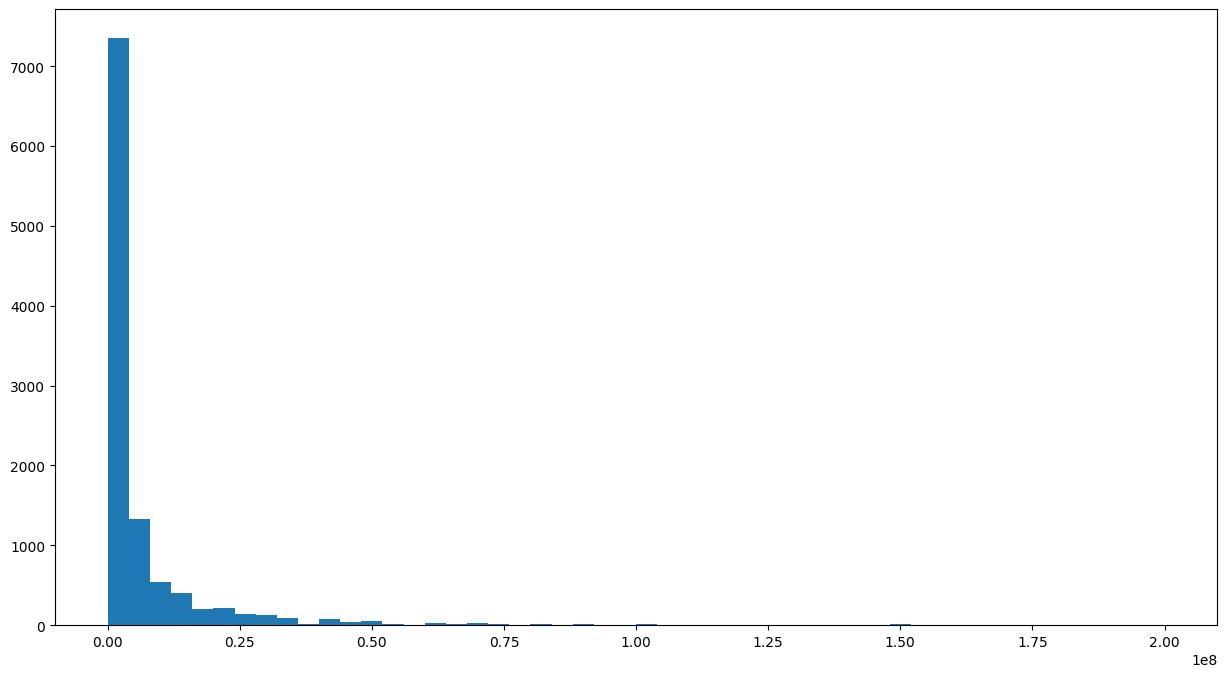

In [212]:
plt.figure(figsize=(15,8))
plt.hist(football_model['highest_value'], bins=50);
plt.show()

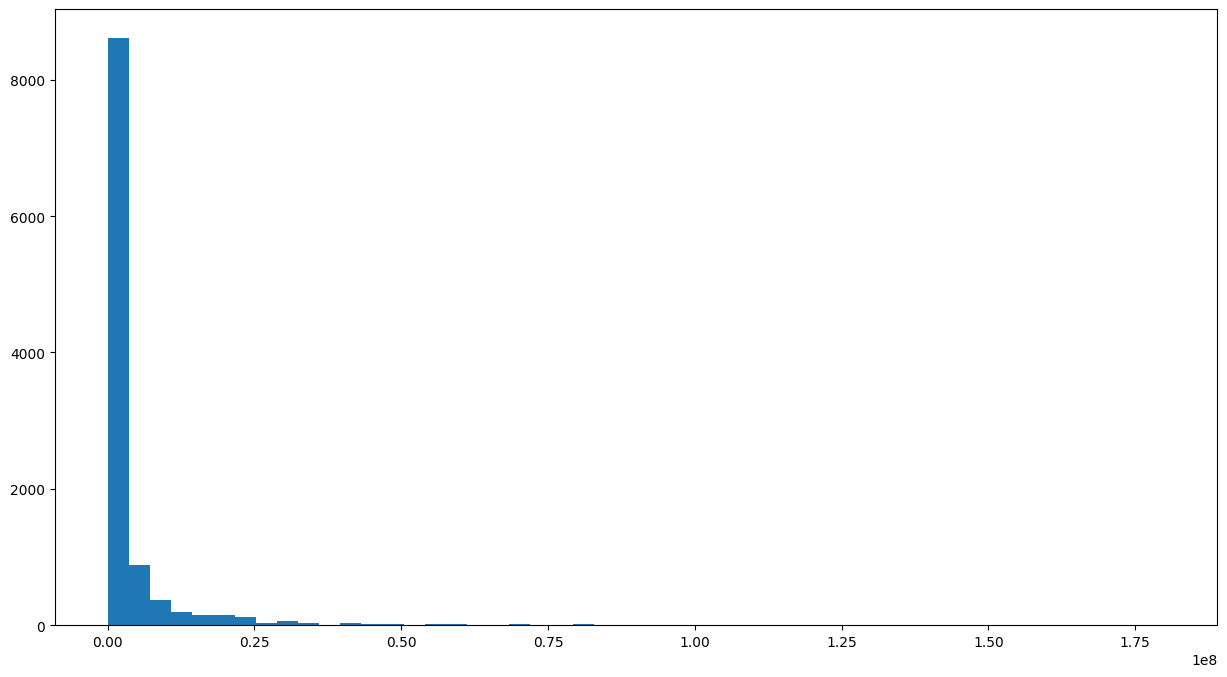

In [213]:
plt.figure(figsize=(15,8))
plt.hist(football_model['current_value'], bins=50);
plt.show()

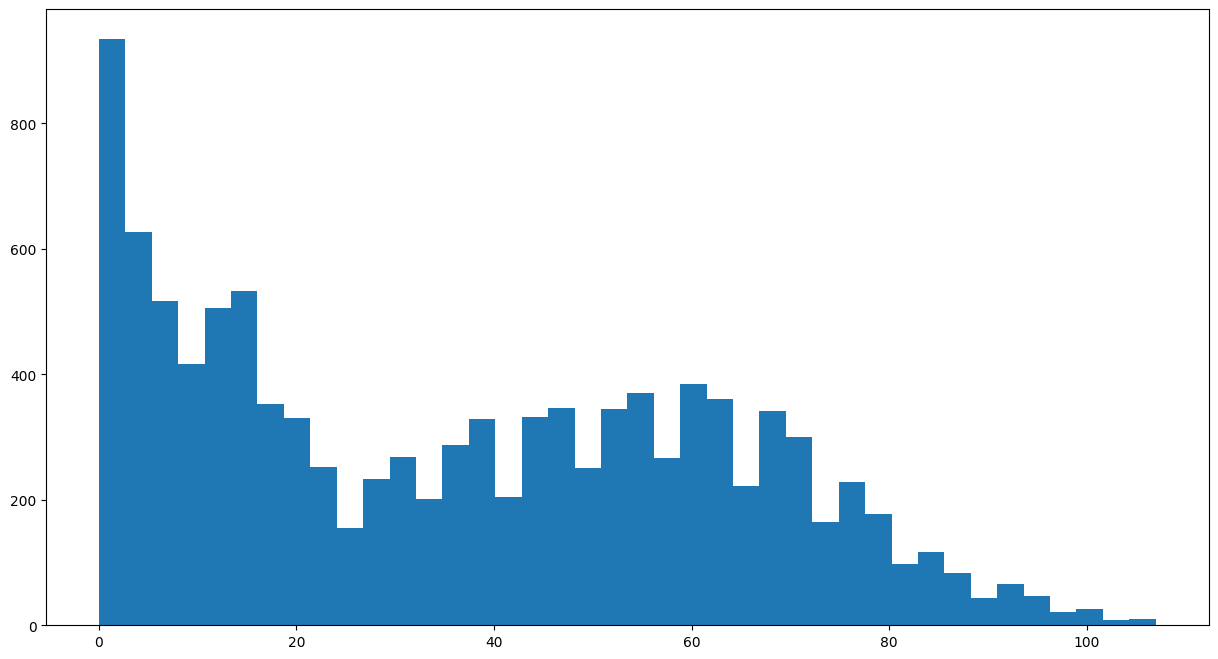

In [214]:
plt.figure(figsize=(15,8))
plt.hist(football_model['appearance'], bins=40);
plt.show()

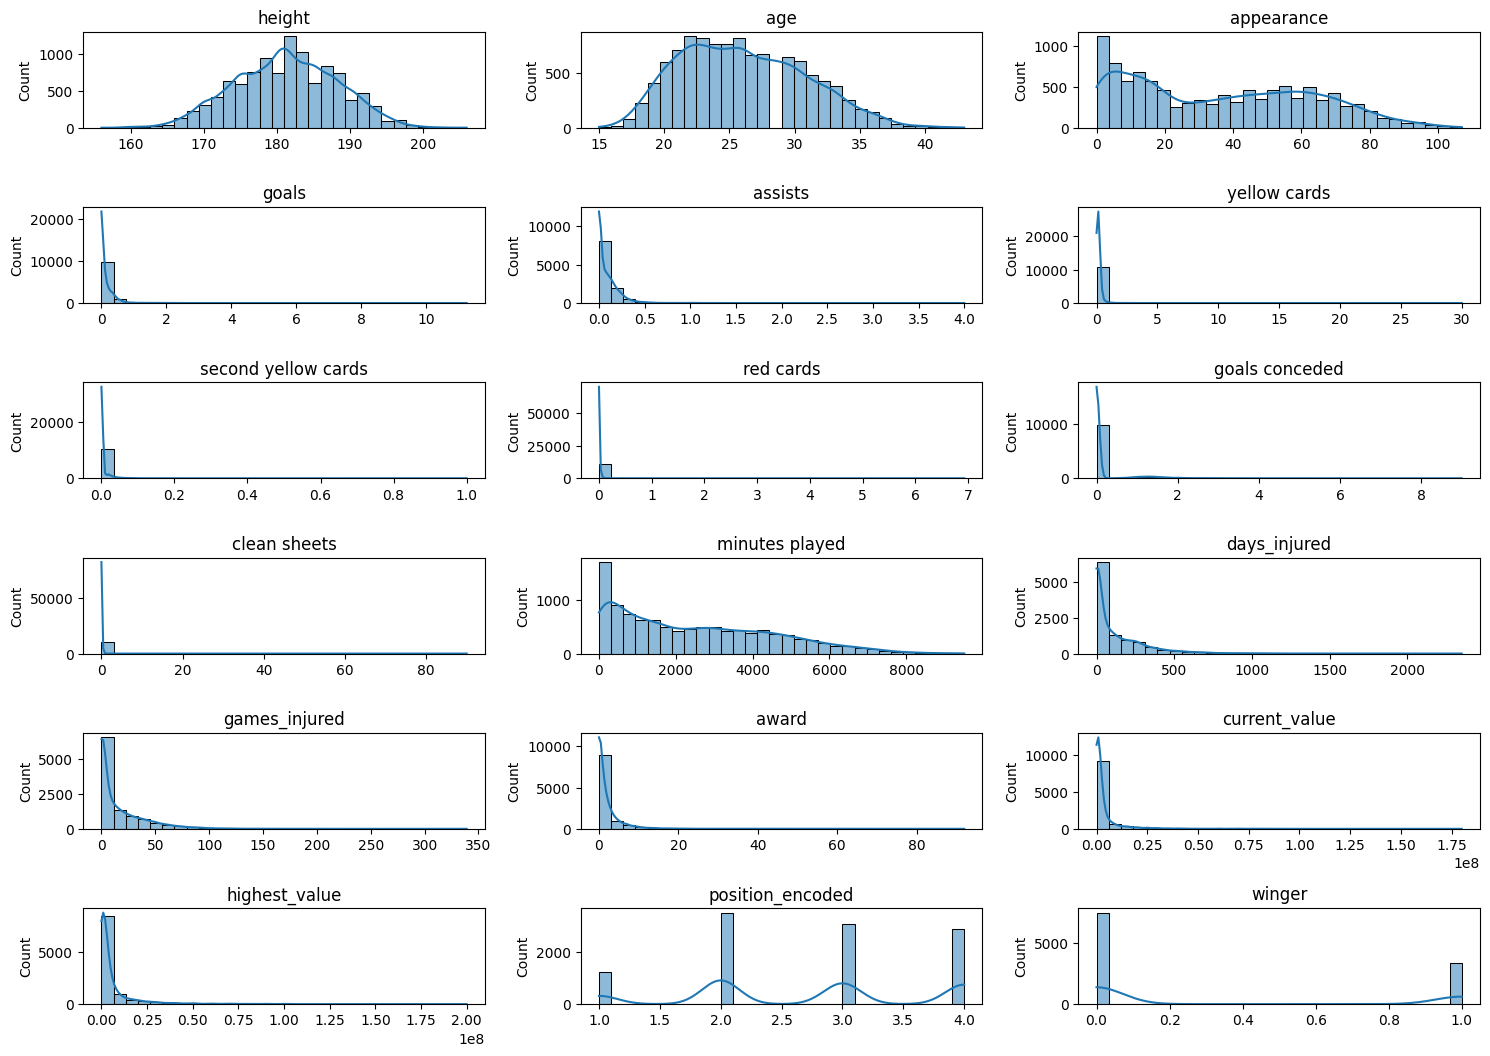

In [215]:
plt.figure(figsize=(15, 12))


num_features = len(numeric_features)
rows = (num_features // 3) + 1
cols = 3

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(football[feature].dropna(), bins=30, kde=True)
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()

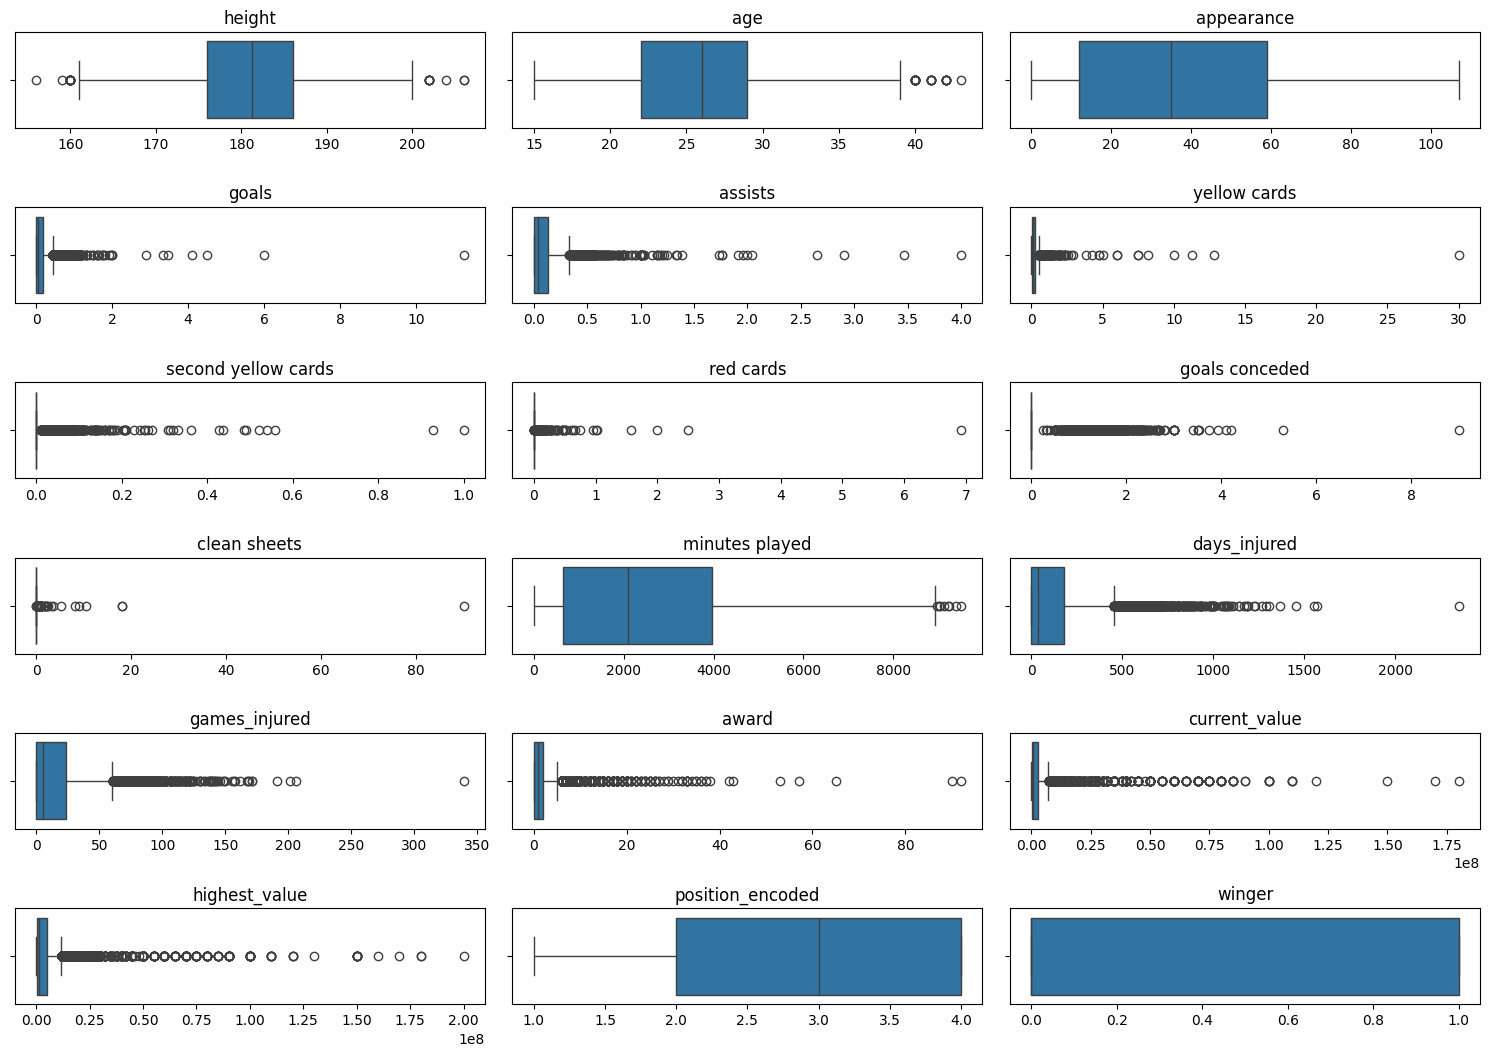

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 12))


num_features = len(numeric_features)
rows = (num_features // 3) + 1
cols = 3

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=football[feature])
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()


In [217]:
# Height & Age normally distributed with some expected outliers
# Minutes Played & Appearances the distribution reflects natural variations between starting players and substitutes
# Goals, Assists, Clean Sheets noticeable outliers, but expected since only a few players achieve exceptional stats
# Yellow & Red Cards some players have an unusually high number of cards
# Days Injured, Games Injured  some players have extremely long injury periods which could exceptional cases
# Current & Highest Value extreme values may result from market fluctuations

In [218]:
def plot_outliers(feature, threshold=0):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=football[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


    if feature not in football.columns:
        print(f"⚠️ Feature '{feature}' not found in dataset.")
        return


    outliers = football[football[feature] > threshold]
    print(f'\nTop {feature} Outliers:')
    print(outliers[['player', 'team', feature]].sort_values(by=feature, ascending=False))


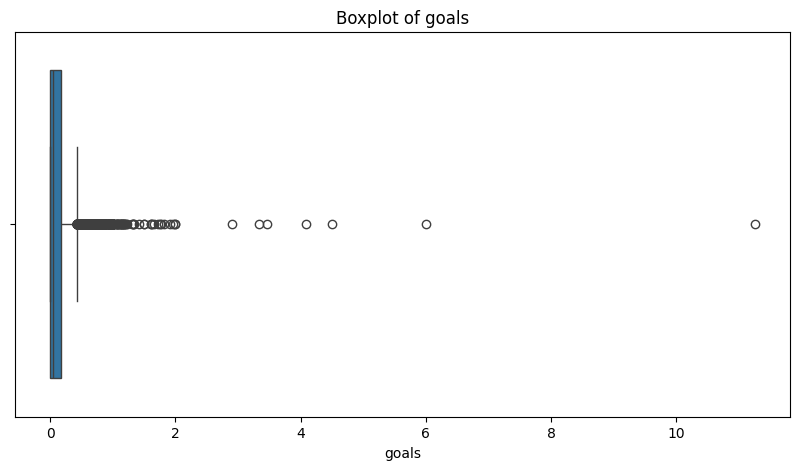


Top goals Outliers:
                                      player                             team  \
9239  /rakan-al-dosari/profil/spieler/998314                      Al-Raed SFC   
3799     /junior-moraes/profil/spieler/52915  Sport Club Corinthians Paulista   

      goals  
9239  11.25  
3799   6.00  


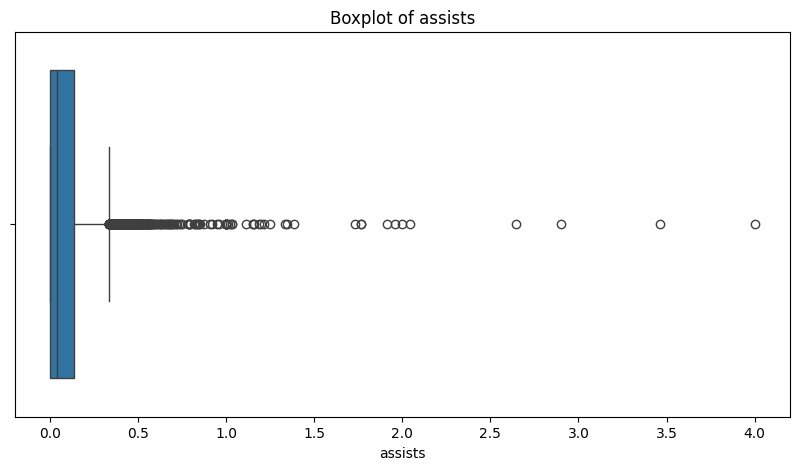


Top assists Outliers:
                                      player          team   assists
8387    /riki-harakawa/profil/spieler/212115  Cerezo Osaka  4.000000
6180  /denis-kovacevic/profil/spieler/672248  Istanbulspor  3.461538


In [219]:
plot_outliers('goals', 5)
plot_outliers('assists', 3)

In [220]:
#The results are natural because only a small percentage of players score or assist goals frequently.

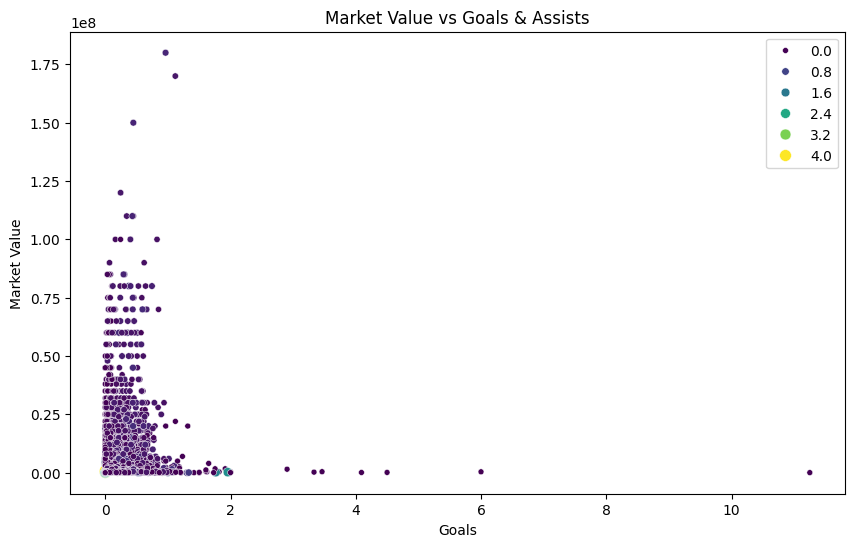

In [221]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=football, x='goals', y='current_value', hue='assists', size='assists', palette='viridis')
plt.title('Market Value vs Goals & Assists')
plt.xlabel('Goals')
plt.ylabel('Market Value')
plt.legend()
plt.show()

In [222]:
# Scoring goals is not the only factor influencing a player's market value, as we can see players with high market value despite scoring only a few goals

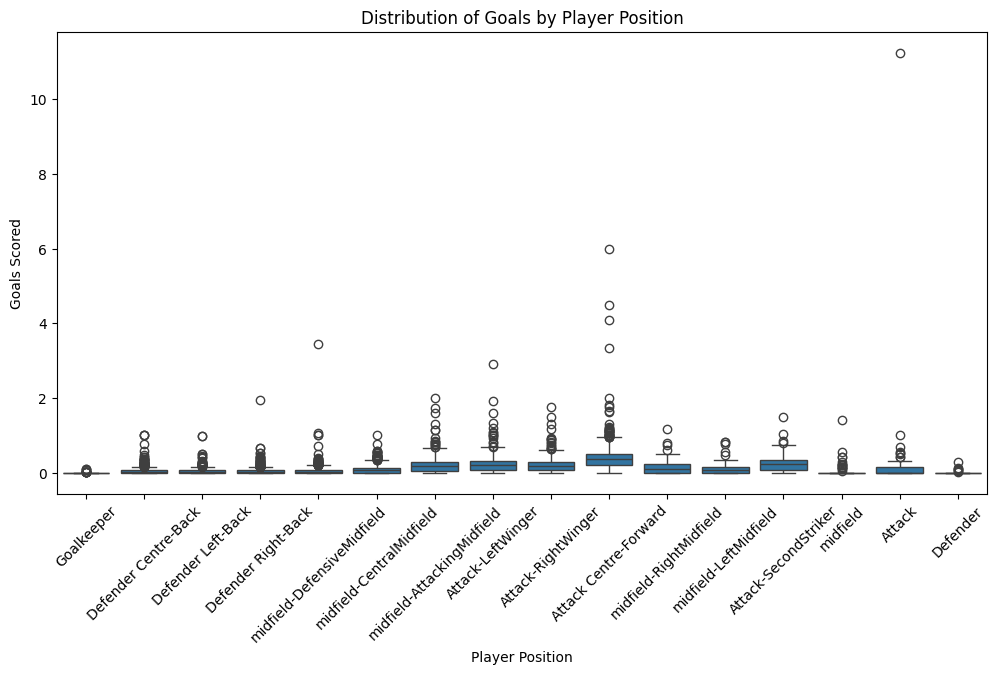

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x=football['position'], y=football['goals'])
plt.xlabel("Player Position")
plt.ylabel("Goals Scored")
plt.title("Distribution of Goals by Player Position")
plt.xticks(rotation=45)
plt.show()


In [224]:
avg_goals_by_position = football.groupby('position')['goals'].mean().sort_values(ascending=False)
print(avg_goals_by_position)


position
Attack Centre-Forward         0.377764
Attack                        0.321874
Attack-SecondStriker          0.273625
Attack-LeftWinger             0.225207
Attack-RightWinger            0.205473
midfield-AttackingMidfield    0.196806
midfield-RightMidfield        0.147148
midfield-LeftMidfield         0.114886
midfield-CentralMidfield      0.093751
midfield                      0.062398
midfield-DefensiveMidfield    0.056701
Defender Right-Back           0.045821
Defender Left-Back            0.043998
Defender Centre-Back          0.043040
Defender                      0.022536
Goalkeeper                    0.000411
Name: goals, dtype: float64


In [225]:
top_valued_players = football[[ "name" ,'team', 'current_value', 'highest_value', 'goals', 'assists']].sort_values(by='current_value', ascending=False).head(10)
print("Top 10 Most Valuable Players:")
print(top_valued_players)

Top 10 Most Valuable Players:
                   name                 team  current_value  highest_value  \
2644      Kylian Mbappé  Paris Saint-Germain      180000000      200000000   
453      Erling Haaland      Manchester City      170000000      170000000   
1521    Vinicius Junior          Real Madrid      150000000      150000000   
960     Jude Bellingham    Borussia Dortmund      120000000      120000000   
450          Phil Foden      Manchester City      110000000      110000000   
1017      Jamal Musiala        Bayern Munich      110000000      110000000   
474         Bukayo Saka           Arsenal FC      110000000      110000000   
1516  Federico Valverde          Real Madrid      100000000      100000000   
1523            Rodrygo          Real Madrid      100000000      100000000   
2023     Victor Osimhen           SSC Napoli      100000000      100000000   

         goals   assists  
2644  0.963082  0.433387  
453   1.118270  0.234699  
1521  0.448356  0.408502  
960

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [226]:
def show_categories(df):
    for i, col in enumerate(df.select_dtypes(include=['object']).columns, start=1):
        print(f"{i}. {col} :\t {df[col].unique()}\n")



In [227]:
show_categories(football)

1. player :	 ['/david-de-gea/profil/spieler/59377'
 '/jack-butland/profil/spieler/128899' '/tom-heaton/profil/spieler/34130'
 ... '/nathanael-blair/profil/spieler/1023268'
 '/zachary-sapsford/profil/spieler/703657'
 '/alexander-badolato/profil/spieler/957230']

2. team :	 ['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton FC' 'Brighton &amp; Hove Albion'
 'Everton FC' 'Nottingham Forest' 'Leeds United' 'Crystal Palace'
 'Fulham FC' 'AFC Bournemouth' 'Brentford FC' 'Liverpool FC'
 'Newcastle United' 'Manchester City' 'Arsenal FC' 'Tottenham Hotspur'
 'Chelsea FC' 'Borussia Mönchengladbach' 'VfL Wolfsburg'
 'TSG 1899 Hoffenheim' '1.FC Union Berlin' 'FC Augsburg' 'VfB Stuttgart'
 '1.FSV Mainz 05' '1.FC Köln' 'Hertha BSC' 'FC Schalke 04' 'VfL Bochum'
 'SV Werder Bremen' 'Eintracht Frankfurt' 'SC Freiburg'
 'Borussia Dortmund' 'Bayer 04 Leverkusen' 'Bayern Munich' 'RB Leipzig'
 'Real Sociedad' 'Villarreal CF' 'Real Betis Balompié' '

### Handling missing values:

In [228]:
# Dataset already clened

### Correcting errors

-------------------

In [229]:
# there is no erorr

### Dealing with outliers:

In [230]:
#  There is no need to remove any outliers
#  The high market values of top players are expected, and the variation in goals and assists is natural since only a few players consistently score or assist at high rates.
#  Removing outliers might lead to the loss of valuable insights.

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

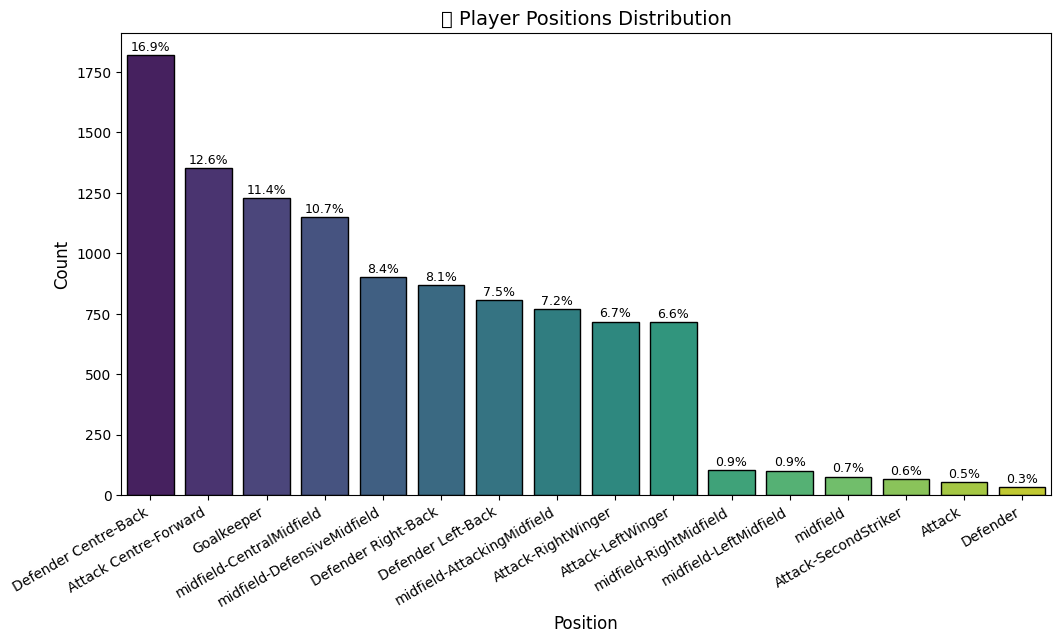

In [231]:
# Set figure size for better visualization
plt.figure(figsize=(12, 6))
position_counts = football["position"].value_counts()

# Create the bar chart
sns.barplot(x=position_counts.index, y=position_counts.values, order=position_counts.index, palette="viridis", edgecolor="black")
plt.xlabel("Position", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("🔹 Player Positions Distribution", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels above bars
for i, v in enumerate(position_counts.values):
    plt.text(i, v + 20, f"{(v / football.shape[0]) * 100:.1f}%", ha='center', fontsize=9, color="black")

# Show the plot
plt.show()



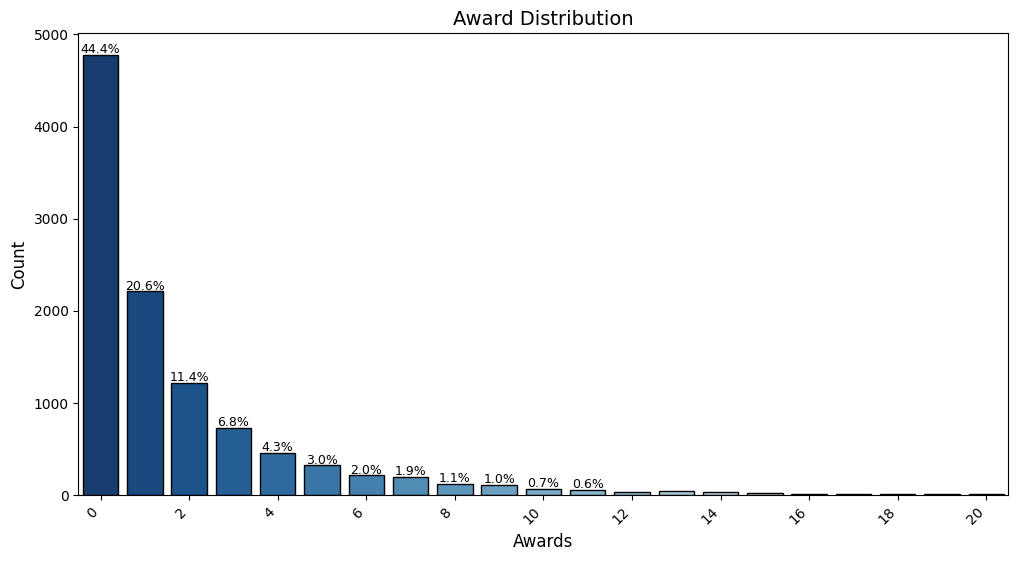

In [232]:
# Set figure size
plt.figure(figsize=(12, 6))

# Get award counts
award_counts = football["award"].value_counts().sort_index()

# Limit x-axis to a reasonable range (e.g., first 20 awards)
max_award_to_show = 20  # Adjust if needed
filtered_award_counts = award_counts[award_counts.index <= max_award_to_show]

# Create the bar chart
sns.barplot(x=filtered_award_counts.index, y=filtered_award_counts.values, palette="Blues_r", edgecolor="black")
plt.xlabel("Awards", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Award Distribution", fontsize=14)

# Adjust x-axis labels (show every 2nd or 5th label to avoid clutter)
plt.xticks(ticks=filtered_award_counts.index[::2], labels=filtered_award_counts.index[::2], rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels above bars
for i, v in enumerate(filtered_award_counts.values):
    if v > 50:  # Display only for significant values to avoid clutter
        plt.text(i, v + 20, f"{(v / football.shape[0]) * 100:.1f}%", ha='center', fontsize=9, color="black")

# Show the plot
plt.show()



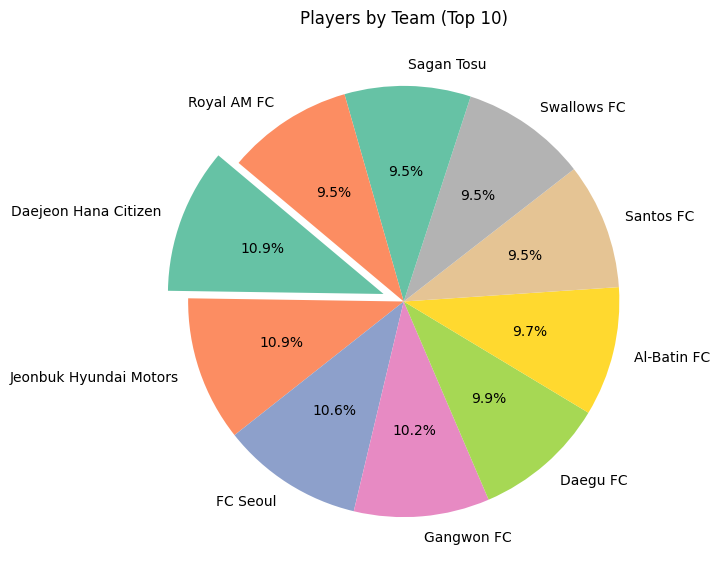

In [233]:
plt.figure(figsize=(7, 7))
top_teams = football["team"].value_counts().nlargest(10)
explode = [0.1] + [0] * 9  # Explode only the first slice for emphasis
plt.pie(top_teams, labels=top_teams.index, autopct="%1.1f%%", colors=sns.color_palette("Set2", len(top_teams)), startangle=140, explode=explode)
plt.title("Players by Team (Top 10)")
plt.show()


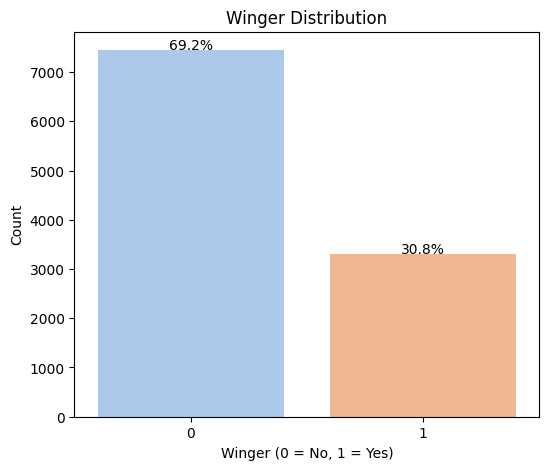

In [234]:
plt.figure(figsize=(6, 5))
winger_counts = football["winger"].value_counts()
sns.barplot(x=winger_counts.index, y=winger_counts.values, palette="pastel")
plt.xlabel("Winger (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Winger Distribution")

# Add percentage labels
for i, v in enumerate(winger_counts.values):
    plt.text(i, v + 5, f"{(v / football.shape[0]) * 100:.1f}%", ha='center')

plt.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

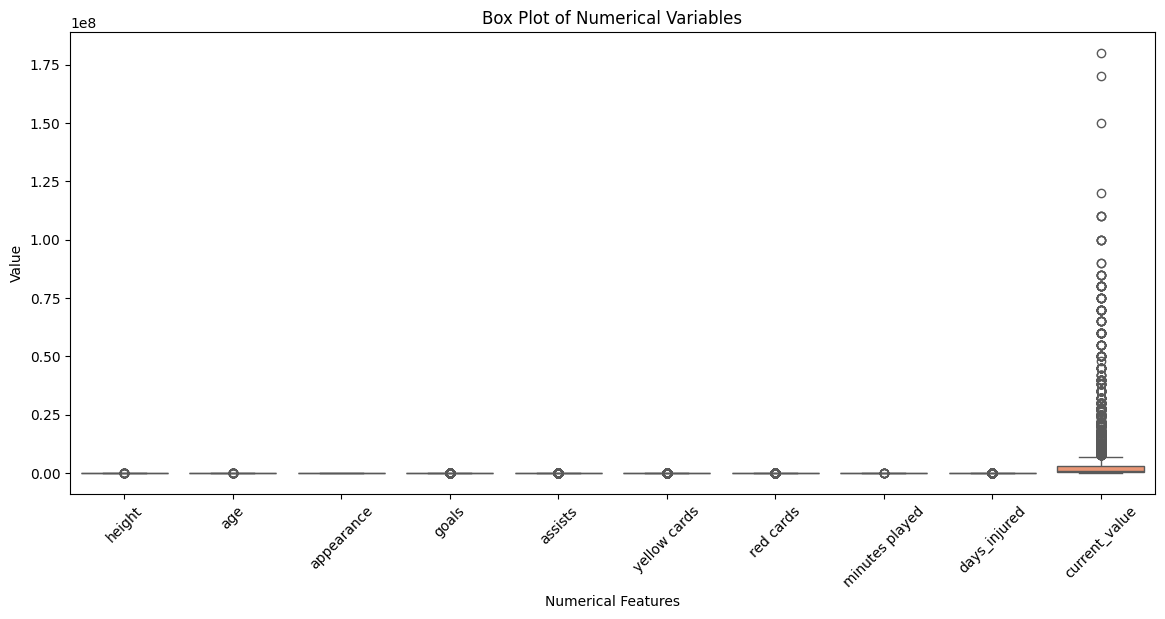

In [235]:
# Define numerical columns
numerical_columns = ["height", "age", "appearance", "goals", "assists",
                     "yellow cards", "red cards", "minutes played",
                     "days_injured", "current_value"]

# Set figure size
plt.figure(figsize=(14, 6))

# Create Box Plot
sns.boxplot(data=football[numerical_columns], palette="Set2")
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.title("Box Plot of Numerical Variables")
plt.ylabel("Value")
plt.xlabel("Numerical Features")

# Show plot
plt.show()


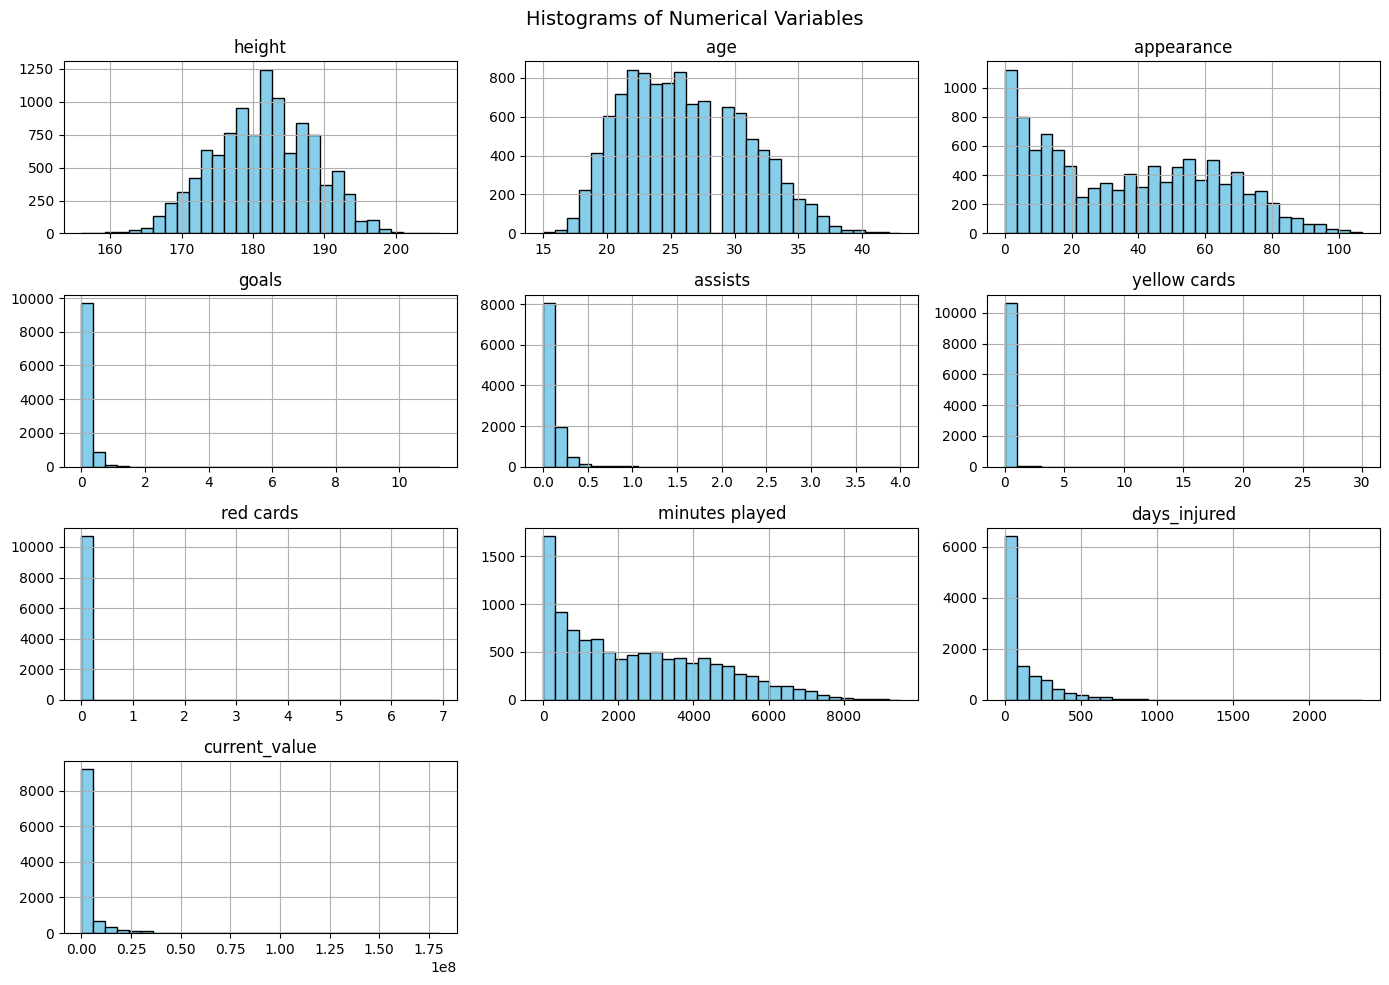

In [236]:
# Set figure size
football[numerical_columns].hist(figsize=(14, 10), bins=30, color="skyblue", edgecolor="black")

# Adjust layout for better spacing
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [237]:

numeric_columns = football.select_dtypes(include=['float64', 'int64'])


statistics = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Mode': numeric_columns.mode().iloc[0],
    'Range': numeric_columns.max() - numeric_columns.min(),
    'Std Dev': numeric_columns.std(),
    'Variance': numeric_columns.var(),
    'Skewness': numeric_columns.skew(),
})


print(statistics)


                             Mean        Median       Mode         Range  \
height               1.812404e+02  1.812404e+02      180.0  5.000000e+01   
age                  2.604190e+01  2.600000e+01       22.0  2.800000e+01   
appearance           3.640701e+01  3.500000e+01        0.0  1.070000e+02   
goals                1.255543e-01  4.596918e-02        0.0  1.125000e+01   
assists              8.697765e-02  4.077323e-02        0.0  4.000000e+00   
yellow cards         1.897572e-01  1.502504e-01        0.0  3.000000e+01   
second yellow cards  4.665667e-03  0.000000e+00        0.0  1.000000e+00   
red cards            6.826070e-03  0.000000e+00        0.0  6.923077e+00   
goals conceded       1.316555e-01  0.000000e+00        0.0  9.000000e+00   
clean sheets         4.488090e-02  0.000000e+00        0.0  9.000000e+01   
minutes played       2.470789e+03  2.101500e+03        0.0  9.510000e+03   
days_injured         1.179617e+02  3.700000e+01        0.0  2.349000e+03   
games_injure

In [238]:
### Key Insights from the Data:
# - Player Age: Avg 26.04 years, typical for professional players.
# - Height: Avg 181.24 cm, standard for footballers.
# - Minutes Played: High variance (Std Dev = 2021.70), big gap between starters and reserves.
# - Goals & Assists: Highly skewed (Skewness = 14.26, 7.35), few top scorers, most players contribute little.
# - Red Cards: Extremely skewed (Skewness = 63.31), most players have none, a few get many.
# - Injuries: Large variation (Range = 2349 days), some rarely injured, others miss seasons.
# - Clean Sheets: Highly skewed (Skewness = 87.39), only a few goalkeepers have many.

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

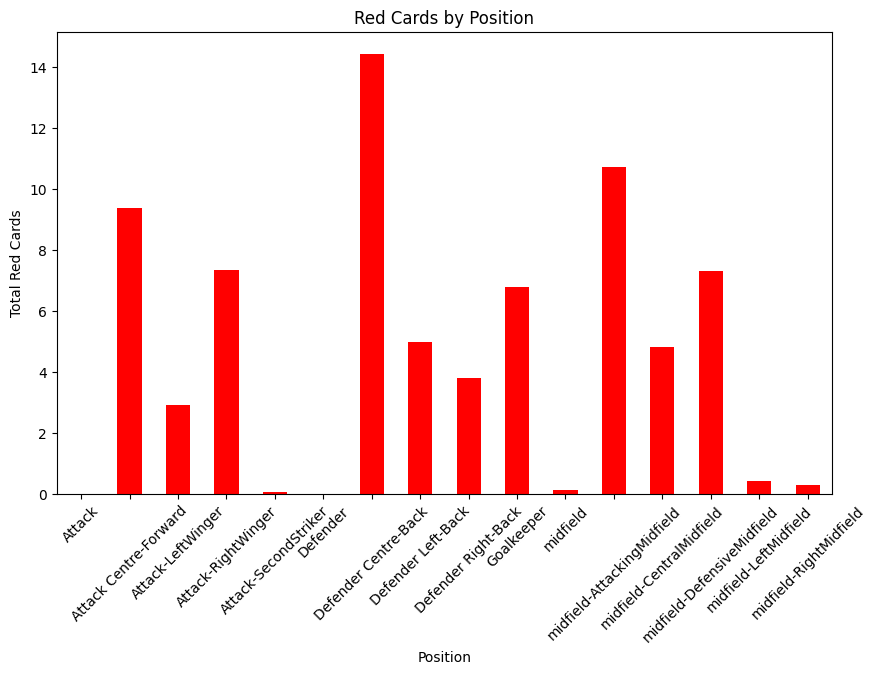

In [239]:
plt.figure(figsize=(10, 6))
position_red_cards = football.groupby("position")["red cards"].sum()
position_red_cards.plot(kind="bar", color="red")
plt.xlabel("Position")
plt.ylabel("Total Red Cards")
plt.title("Red Cards by Position")
plt.xticks(rotation=45)
plt.show()


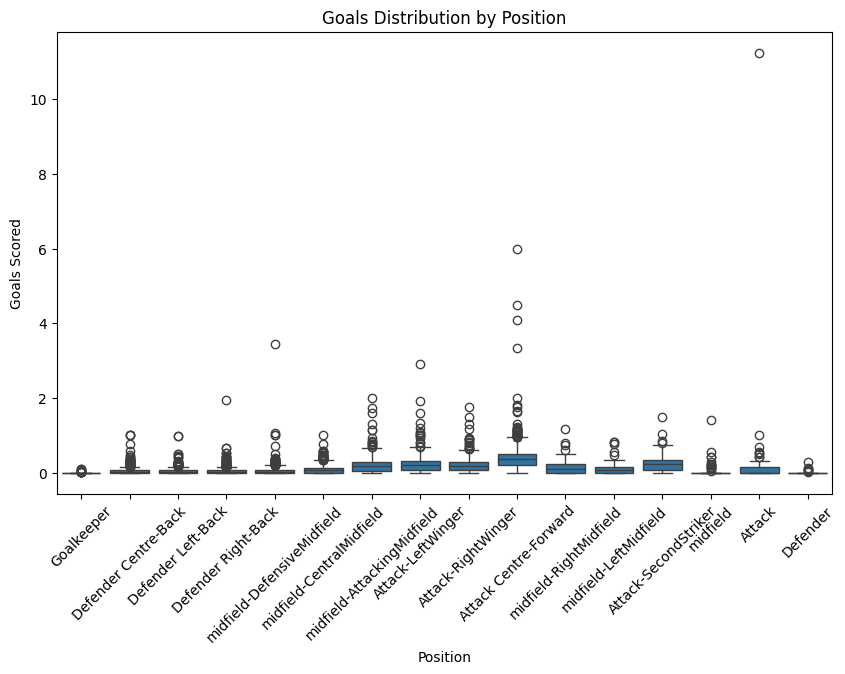

In [240]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="position", y="goals", data=football)
plt.xlabel("Position")
plt.ylabel("Goals Scored")
plt.title("Goals Distribution by Position")
plt.xticks(rotation=45)
plt.show()


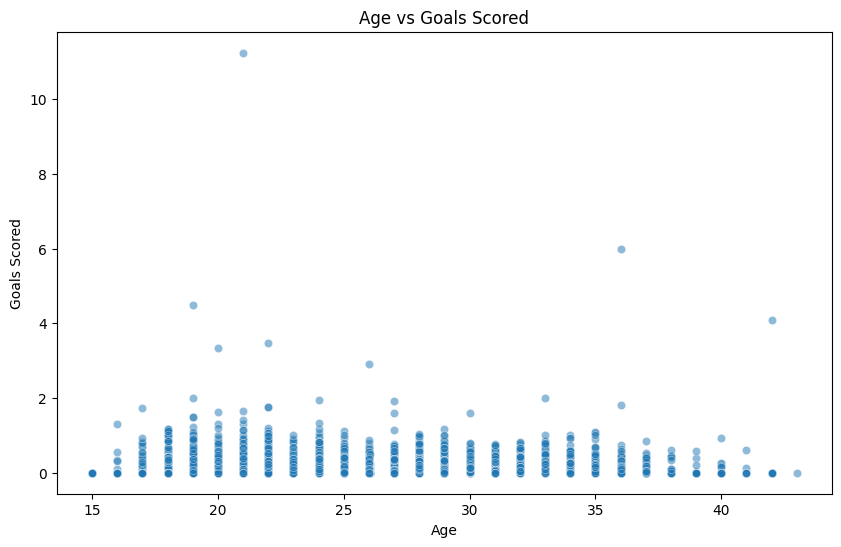

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=football["age"], y=football["goals"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Goals Scored")
plt.title("Age vs Goals Scored")
plt.show()


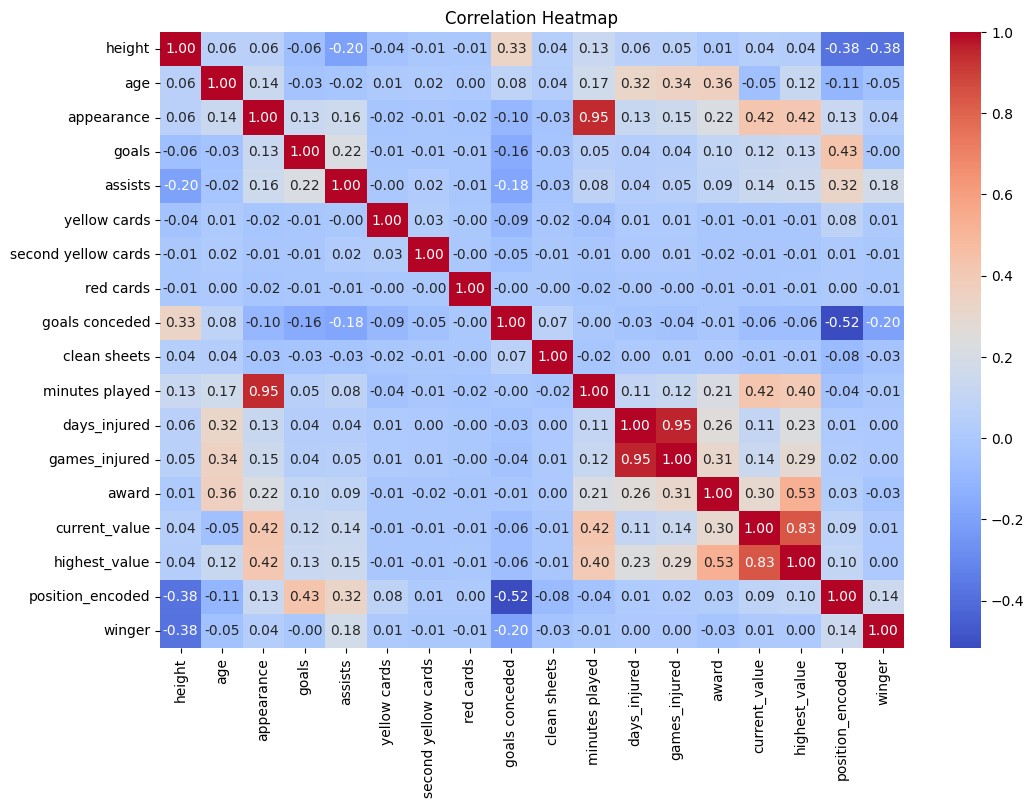

In [242]:

numeric_df = football.select_dtypes(include=["number"])


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [243]:
football_model.shape

(10754, 20)

In [244]:
football.current_value

0        15000000
1         1500000
2          600000
3        50000000
4        40000000
           ...   
10749       75000
10750      300000
10751       50000
10752       50000
10753       25000
Name: current_value, Length: 10754, dtype: int64

In [245]:
categorical_features

['team', 'position']

In [246]:
# one hot coding
football_model = pd.get_dummies(football_model, columns=categorical_features)

In [247]:
football_model.shape

(10754, 408)

In [248]:
football_model.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,team_AC Monza,team_ACF Fiorentina,team_AFC Bournemouth,team_AJ Auxerre,team_AS Monaco,team_AS Roma,team_AZ Alkmaar,team_Abha Club,team_Adana Demirspor,team_Adelaide United,team_Ajax Amsterdam,team_Akhmat Grozny,team_Al-Adalah FC,team_Al-Batin FC,team_Al-Fateh SC,team_Al-Fayha FC,team_Al-Hilal Saudi FC,team_Al-Ittihad Club (Jeddah),team_Al-Khaleej,team_Al-Nassr FC,team_Al-Raed SFC,team_Al-Shabab Club (Riyadh),team_Al-Taawoun FC,team_Al-Tai,team_Al-Wehda FC,team_Alanyaspor,team_Albirex Niigata,team_AmaZulu FC,team_América Futebol Clube (MG),team_Angers SCO,team_Antalyaspor,team_Arsenal FC,team_Arsenal Fútbol Club,team_Aston Villa,team_Atalanta BC,team_Athletic Bilbao,team_Atlanta United FC,team_Atlas Guadalajara,team_Atlético de Madrid,team_Atlético de San Luis,team_Austin FC,team_Austria Vienna,team_Avispa Fukuoka,team_Basaksehir FK,team_Bayer 04 Leverkusen,team_Bayern Munich,team_Besiktas JK,team_Birmingham City,team_Blackburn Rovers,team_Blackpool FC,team_Boavista FC,team_Bologna FC 1909,team_Borussia Dortmund,team_Borussia Mönchengladbach,team_Botafogo de Futebol e Regatas,team_Brentford FC,team_Brighton &amp; Hove Albion,team_Brisbane Roar,team_Bristol City,team_Burnley FC,team_CA Banfield,team_CA Barracas Central,team_CA Boca Juniors,team_CA Central Córdoba (SdE),team_CA Colon,team_CA Huracán,team_CA Independiente,team_CA Newell's Old Boys,team_CA Osasuna,team_CA River Plate,team_CA Rosario Central,team_CA San Lorenzo de Almagro,team_CA Sarmiento (Junin),team_CA Vélez Sarsfield,team_CD Cruz Azul,team_CD Godoy Cruz Antonio Tomba,team_CD Santa Clara,team_CF América,team_CF Monterrey,team_CF Montréal,team_CF Pachuca,team_CR Flamengo,team_CS Marítimo,team_CSKA Moscow,team_Cape Town City FC,team_Cardiff City,team_Casa Pia AC,team_Celta de Vigo,team_Central Coast Mariners,team_Cerezo Osaka,team_Charlotte FC,team_Chelsea FC,team_Chicago Fire FC,team_Chippa United,team_Clermont Foot 63,team_Club Athletico Paranaense,team_Club Atlético Belgrano,team_Club Atlético Lanús,team_Club Atlético Platense,team_Club Atlético Talleres,team_Club Atlético Tigre,team_Club Atlético Tucumán,team_Club Atlético Unión,team_Club Estudiantes de La Plata,team_Club León FC,team_Club Necaxa,team_Club Tijuana,team_Club de Gimnasia y Esgrima La Plata,team_Clube Atlético Mineiro,team_Clube de Regatas Vasco da Gama,team_Colorado Rapids,team_Columbus Crew,team_Coritiba Foot Ball Club,team_Coventry City,team_Cruzeiro Esporte Clube,team_Crystal Palace,team_Cuiabá Esporte Clube (MT),team_Cádiz CF,team_D.C. United,team_Daegu FC,team_Daejeon Hana Citizen,team_Damac FC,team_Defensa y Justicia,team_Deportivo Guadalajara,team_Deportivo Toluca,team_Dynamo Moscow,team_ESTAC Troyes,team_Eintracht Frankfurt,team_Elche CF,team_Esporte Clube Bahia,team_Ettifaq FC,team_Everton FC,team_Excelsior Rotterdam,team_FC Arouca,team_FC Augsburg,team_FC Barcelona,team_FC Cincinnati,team_FC Dallas,team_FC Emmen,team_FC Empoli,team_FC Famalicão,team_FC Groningen,team_FC Juárez,team_FC Lorient,team_FC Nantes,team_FC Pari Nizhniy Novgorod,team_FC Paços de Ferreira,team_FC Porto,team_FC Schalke 04,team_FC Seoul,team_FC Sochi,team_FC Tokyo,team_FC Toulouse,team_FC Utrecht,team_FC Vizela,team_FC Volendam,team_FK Khimki,team_FK Krasnodar,team_FK Orenburg,team_FK Rostov,team_Fakel Voronezh,team_Fatih Karagümrük,team_Fenerbahce,team_Feyenoord Rotterdam,team_Fluminense Football Club,team_Fortaleza Esporte Clube,team_Fortuna Sittard,team_Fulham FC,team_GD Chaves,team_GD Estoril Praia,team_Galatasaray,team_Gamba Osaka,team_Gangwon FC,team_Gaziantep FK,team_Getafe CF,team_Gil Vicente FC,team_Giresunspor,team_Girona FC,team_Go Ahead Eagles,team_Goiás Esporte Clube,team_Grêmio Foot-B

Logistic Regression

In [249]:
# Calculate the 35th and 75th percentiles of the current_value
p25 = football['current_value'].quantile(0.25)
p85 = football['current_value'].quantile(0.85)

# Function to categorize prices
def categorize_price(price):
    if price < p25:
        return 'Cheap_value'
    elif price < p85:
        return 'Good_value'
    else:
        return 'High_value'

# Apply the function to create a new column
football['current_value_category'] = football['current_value'].apply(categorize_price)

football.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(football['current_value_category'].value_counts())

current_value_category
Good_value     6378
Cheap_value    2579
High_value     1797
Name: count, dtype: int64


In [250]:
p25, p85

(np.float64(300000.0), np.float64(5000000.0))

In [251]:
football['current_value_category']

0         High_value
1         Good_value
2         Good_value
3         High_value
4         High_value
            ...     
10749    Cheap_value
10750     Good_value
10751    Cheap_value
10752    Cheap_value
10753    Cheap_value
Name: current_value_category, Length: 10754, dtype: object

In [252]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
football['current_value_category_encoded'] = encoder.fit_transform(football['current_value_category'])  

#### 3. Feature selection

Logistic Regression

In [253]:
correlation = football.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
appearance                        0.546508
minutes played                    0.517867
highest_value                     0.514810
award                             0.252729
games_injured                     0.231517
days_injured                      0.204535
assists                           0.162110
position_encoded                  0.134594
goals                             0.123461
age                               0.062198
winger                            0.042123
height                            0.023989
yellow cards                      0.015456
red cards                         0.003112
second yellow cards               0.002266
clean sheets                     -0.016518
goals conceded                   -0.127656
Name: current_value_category_encoded, dtype: float64


In [365]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index


In [366]:
selected_features

Index(['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'highest_value', 'current_value_category_encoded'],
      dtype='object')

In [367]:
selected_features = ['appearance', 'minutes played', 'highest_value', 'current_value_category_encoded']

In [368]:
football = football[selected_features]
football.head()

,appearance,minutes played,highest_value,current_value_category_encoded
0,104,9390,70000000,2
1,15,1304,22000000,1
2,4,292,6000000,1
3,82,6408,50000000,2
4,63,5031,80000000,2


In [369]:
football_model.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,team_AC Monza,team_ACF Fiorentina,team_AFC Bournemouth,team_AJ Auxerre,team_AS Monaco,team_AS Roma,team_AZ Alkmaar,team_Abha Club,team_Adana Demirspor,team_Adelaide United,team_Ajax Amsterdam,team_Akhmat Grozny,team_Al-Adalah FC,team_Al-Batin FC,team_Al-Fateh SC,team_Al-Fayha FC,team_Al-Hilal Saudi FC,team_Al-Ittihad Club (Jeddah),team_Al-Khaleej,team_Al-Nassr FC,team_Al-Raed SFC,team_Al-Shabab Club (Riyadh),team_Al-Taawoun FC,team_Al-Tai,team_Al-Wehda FC,team_Alanyaspor,team_Albirex Niigata,team_AmaZulu FC,team_América Futebol Clube (MG),team_Angers SCO,team_Antalyaspor,team_Arsenal FC,team_Arsenal Fútbol Club,team_Aston Villa,team_Atalanta BC,team_Athletic Bilbao,team_Atlanta United FC,team_Atlas Guadalajara,team_Atlético de Madrid,team_Atlético de San Luis,team_Austin FC,team_Austria Vienna,team_Avispa Fukuoka,team_Basaksehir FK,team_Bayer 04 Leverkusen,team_Bayern Munich,team_Besiktas JK,team_Birmingham City,team_Blackburn Rovers,team_Blackpool FC,team_Boavista FC,team_Bologna FC 1909,team_Borussia Dortmund,team_Borussia Mönchengladbach,team_Botafogo de Futebol e Regatas,team_Brentford FC,team_Brighton &amp; Hove Albion,team_Brisbane Roar,team_Bristol City,team_Burnley FC,team_CA Banfield,team_CA Barracas Central,team_CA Boca Juniors,team_CA Central Córdoba (SdE),team_CA Colon,team_CA Huracán,team_CA Independiente,team_CA Newell's Old Boys,team_CA Osasuna,team_CA River Plate,team_CA Rosario Central,team_CA San Lorenzo de Almagro,team_CA Sarmiento (Junin),team_CA Vélez Sarsfield,team_CD Cruz Azul,team_CD Godoy Cruz Antonio Tomba,team_CD Santa Clara,team_CF América,team_CF Monterrey,team_CF Montréal,team_CF Pachuca,team_CR Flamengo,team_CS Marítimo,team_CSKA Moscow,team_Cape Town City FC,team_Cardiff City,team_Casa Pia AC,team_Celta de Vigo,team_Central Coast Mariners,team_Cerezo Osaka,team_Charlotte FC,team_Chelsea FC,team_Chicago Fire FC,team_Chippa United,team_Clermont Foot 63,team_Club Athletico Paranaense,team_Club Atlético Belgrano,team_Club Atlético Lanús,team_Club Atlético Platense,team_Club Atlético Talleres,team_Club Atlético Tigre,team_Club Atlético Tucumán,team_Club Atlético Unión,team_Club Estudiantes de La Plata,team_Club León FC,team_Club Necaxa,team_Club Tijuana,team_Club de Gimnasia y Esgrima La Plata,team_Clube Atlético Mineiro,team_Clube de Regatas Vasco da Gama,team_Colorado Rapids,team_Columbus Crew,team_Coritiba Foot Ball Club,team_Coventry City,team_Cruzeiro Esporte Clube,team_Crystal Palace,team_Cuiabá Esporte Clube (MT),team_Cádiz CF,team_D.C. United,team_Daegu FC,team_Daejeon Hana Citizen,team_Damac FC,team_Defensa y Justicia,team_Deportivo Guadalajara,team_Deportivo Toluca,team_Dynamo Moscow,team_ESTAC Troyes,team_Eintracht Frankfurt,team_Elche CF,team_Esporte Clube Bahia,team_Ettifaq FC,team_Everton FC,team_Excelsior Rotterdam,team_FC Arouca,team_FC Augsburg,team_FC Barcelona,team_FC Cincinnati,team_FC Dallas,team_FC Emmen,team_FC Empoli,team_FC Famalicão,team_FC Groningen,team_FC Juárez,team_FC Lorient,team_FC Nantes,team_FC Pari Nizhniy Novgorod,team_FC Paços de Ferreira,team_FC Porto,team_FC Schalke 04,team_FC Seoul,team_FC Sochi,team_FC Tokyo,team_FC Toulouse,team_FC Utrecht,team_FC Vizela,team_FC Volendam,team_FK Khimki,team_FK Krasnodar,team_FK Orenburg,team_FK Rostov,team_Fakel Voronezh,team_Fatih Karagümrük,team_Fenerbahce,team_Feyenoord Rotterdam,team_Fluminense Football Club,team_Fortaleza Esporte Clube,team_Fortuna Sittard,team_Fulham FC,team_GD Chaves,team_GD Estoril Praia,team_Galatasaray,team_Gamba Osaka,team_Gangwon FC,team_Gaziantep FK,team_Getafe CF,team_Gil Vicente FC,team_Giresunspor,team_Girona FC,team_Go Ahead Eagles,team_Goiás Esporte Clube,team_Grêmio Foot-B

#### 4. Prepare train and test data

In [370]:
# Prepare data
X = football.drop(['current_value_category_encoded'], axis=1)
y = football['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [371]:
X.shape

(10754, 3)

## Buliding the Model

In [514]:
model = KNeighborsClassifier()

In [695]:
param_grid = {
    'n_neighbors': [ 27, 30, 33, 35, 37,40 , 45 , 47 , 50 , 60 ], 
    'metric': ["manhattan"]
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [696]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=35),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [27, 30, 33, 35, 37, 40, 45, 47, 50,
                                         60]},
             scoring='f1_macro', verbose=1)

In [698]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 27}

In [699]:
model = grid_search.best_estimator_

In [700]:
model

KNeighborsClassifier(metric='manhattan', n_neighbors=27)

## Test the Model

In [701]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model 

In [702]:
# our benchmark model
base_model = round(football['current_value_category_encoded'].value_counts()[1]/football.shape[0]*100, 2)
base_model

np.float64(59.31)

1. Accuracy

In [703]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8184354295013367

In [704]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8154346815434682

In [705]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 348,  180,    3],
       [  45, 1157,   83],
       [   0,   86,  249]])

In [706]:
print("Train classification report for best knn:")
print(f' {classification_report(y_train, y_pred_train, labels=list(model.classes_))}')
print("Test classification report for best knn: ")
print(f'{classification_report(y_test, y_pred, labels=list(model.classes_))}')

Train classification report for best knn:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      2048
           1       0.81      0.90      0.86      5093
           2       0.79      0.73      0.76      1462

    accuracy                           0.82      8603
   macro avg       0.82      0.77      0.79      8603
weighted avg       0.82      0.82      0.82      8603

Test classification report for best knn: 
              precision    recall  f1-score   support

           0       0.89      0.66      0.75       531
           1       0.81      0.90      0.85      1285
           2       0.74      0.74      0.74       335

    accuracy                           0.82      2151
   macro avg       0.81      0.77      0.78      2151
weighted avg       0.82      0.82      0.81      2151



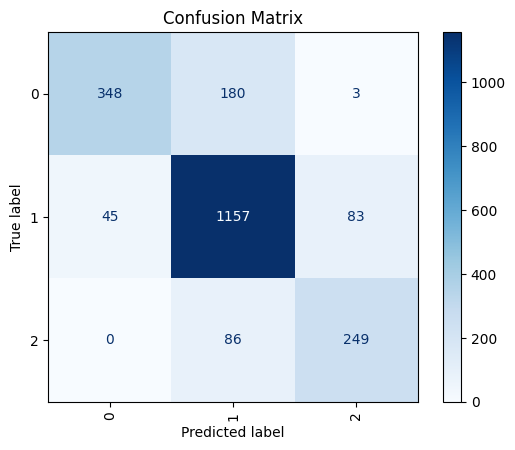

In [707]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [708]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.81


In [709]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.77


In [710]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.78
